In [1]:
import matplotlib.pyplot as plt #To plot the functions and graphs in part1 and part5
import numpy as np # To use various numpy functions
from utils import part1CreateDataset 
from utils import part1PlotBoundary
from utils import part2Plots
from utils import part3Plots
from utils import part4Plots
from utils import part5Plots
import torchvision
import torch
import torch.optim as optim
import pickle # To save and load the dictionaries as file


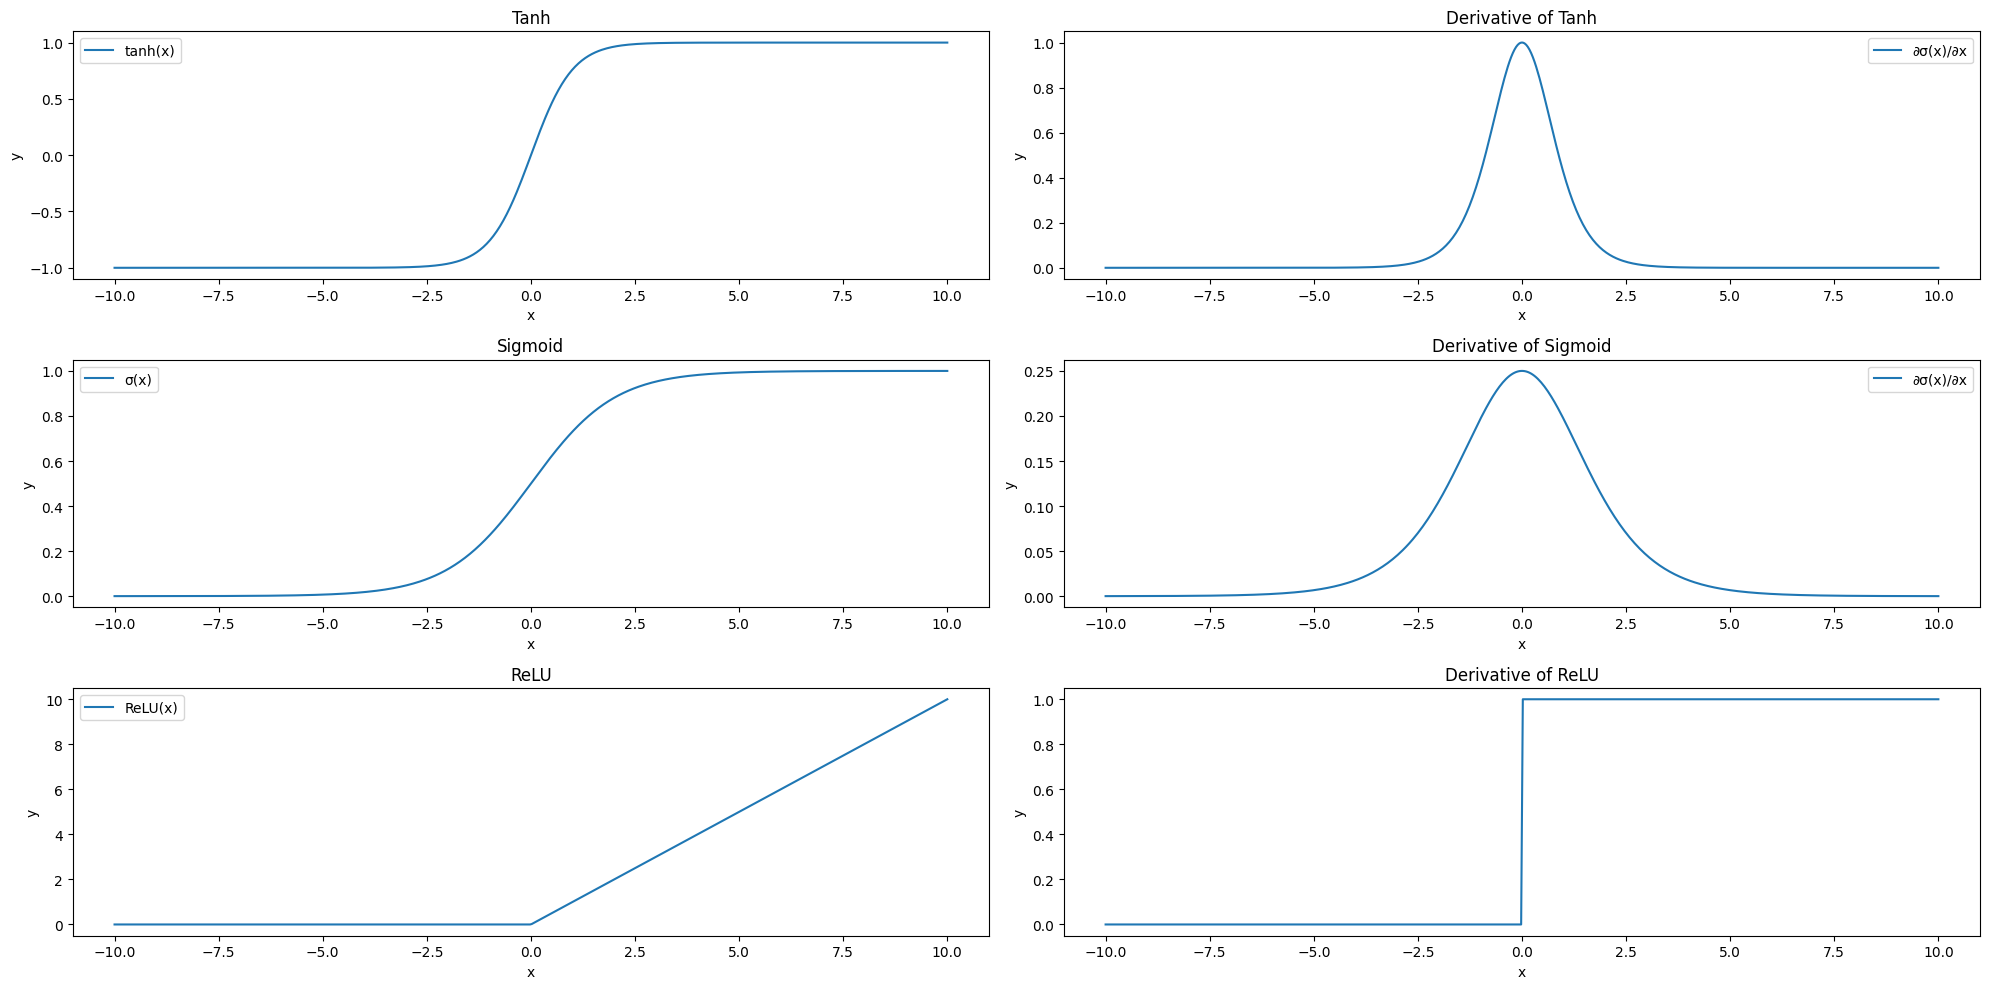

In [29]:
x = np.linspace(-10,10,500) # Number of points is chosen as 500 to clearly plot the activation functions
# Definnig the vectors to be plotted
y1 = np.tanh(x) 
y2 = 1/(1+np.exp(-x))
y3 = np.maximum(0,x)
y1_derivative = 1-y1**2
y2_derivative = np.exp(-x)/((np.exp(-x)+1)**2)
y3_derivative = np.where(x>0, 1 , 0)
plt.figure(figsize=(20, 10)) # Appropriate figure size

plt.subplot(3, 2, 1)
plt.plot(x, y1, label='tanh(x)')
plt.title('Tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, y2, label='σ(x)')

plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, y3, label='ReLU(x)')
plt.title('ReLU')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(x, y1_derivative, label='∂σ(x)/∂x')
plt.title('Derivative of Tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(3, 2, 4)
plt.plot(x, y2_derivative, label='∂σ(x)/∂x')
plt.title('Derivative of Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(3, 2, 6)
plt.plot(x, y3_derivative, label='∂ReLU(x)/∂x')
plt.title('Derivative of ReLU')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

Epoch 0: Loss = 0.33339143681008243
Epoch 1000: Loss = 0.2574053812931472
Epoch 2000: Loss = 0.24885118150645666
Epoch 3000: Loss = 0.25024595189530685
Epoch 4000: Loss = 0.24991456816727528
Epoch 5000: Loss = 0.2501560224273652
Epoch 6000: Loss = 0.2500377126939592
Epoch 7000: Loss = 0.24992982298906385
Epoch 8000: Loss = 0.2499663151356637
Epoch 9000: Loss = 0.24997805798780853
48.0 % of test examples classified correctly.


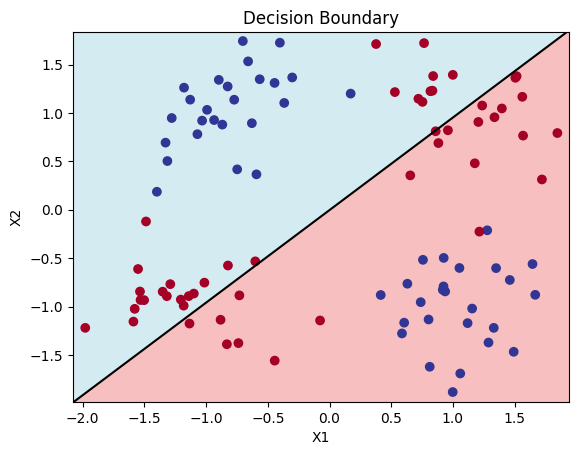

In [3]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
# Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    def sigmoid_derivative(self, x):
        return x/((1+np.exp(-x))**2)
    def forward(self, inputs):
# Forward pass through the network
        self.hidden_output = self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    def backward(self, inputs, targets, learning_rate):
# Backward pass through the network
# Compute error
        output_error = targets-self.output
        hidden_error = np.dot(output_error,self.weights_hidden_output.T)
# Compute gradients
        output_delta = self.sigmoid_derivative(self.output) * output_error
        hidden_delta = self.sigmoid_derivative(self.hidden_output) * hidden_error
# Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate* np.dot(self.hidden_output.T,output_delta)
        self.bias_output = self.bias_output+ learning_rate*np.sum(output_delta, axis = 0)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate*np.dot(inputs.T,hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate*np.sum(hidden_delta, axis=0)

x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)
#Then you may define network parameters, create the network, train and test it.
# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.001
# Create neural network
nn = MLP(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
# Forward propagation
    output = nn.forward(x_train)
# Backpropagation
    nn.backward(x_train, y_train, learning_rate)

# Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((output -y_train)**2)
        print(f'Epoch {epoch}: Loss = {loss}')
# Test the trained neural network
y_predict = np.round(nn.forward(x_val)).astype(int)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')
#Finally, you should plot your final decision boundary from part1PlotBoundary function in utils.py.
part1PlotBoundary(x_val, y_val, nn)

Epoch 0: Loss = 0.2733520717019801
Epoch 1000: Loss = 0.2513389603360019
Epoch 2000: Loss = 0.25011925141295355
Epoch 3000: Loss = 0.25017218960147325
Epoch 4000: Loss = 0.24961653653139362
Epoch 5000: Loss = 0.24974172801839326
Epoch 6000: Loss = 0.24995582958128465
Epoch 7000: Loss = 0.2500001420508438
Epoch 8000: Loss = 0.25004663948660943
Epoch 9000: Loss = 0.2500985581089176
31.0 % of test examples classified correctly.


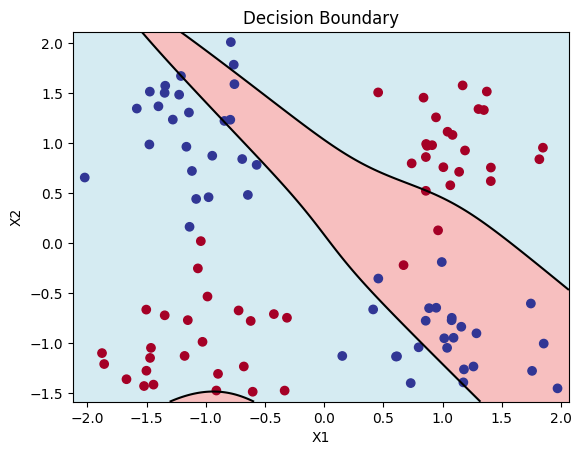

In [4]:
class MLP_V2:  #ReLU
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
# Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
    def ReLU(self, x):
        return np.max(0,x)
    def ReLU_derivative(self, x):
        return np.where(x>0, 1 , 0)
    def forward(self, inputs):
# Forward pass through the network
        self.hidden_output = self.ReLU(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output = self.ReLU(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    def backward(self, inputs, targets, learning_rate):
# Backward pass through the network
# Compute error
        output_error = targets-self.output
        hidden_error = np.dot(output_error,self.weights_hidden_output.T)
# Compute gradients
        output_delta = self.ReLU_derivative(self.output) * output_error
        hidden_delta = self.ReLU_derivative(self.hidden_output) * hidden_error
# Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate* np.dot(self.hidden_output.T,output_delta)
        self.bias_output = self.bias_output+ learning_rate*np.sum(output_delta, axis = 0)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate*np.dot(inputs.T,hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate*np.sum(hidden_delta, axis=0),
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)
#Then you may define network parameters, create the network, train and test it.
# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.001
# Create neural network
nn = MLP(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
# Forward propagation
    output = nn.forward(x_train)
# Backpropagation
    nn.backward(x_train, y_train, learning_rate)

# Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((output -y_train)**2)
        print(f'Epoch {epoch}: Loss = {loss}')
# Test the trained neural network
y_predict = np.round(nn.forward(x_val)).astype(int)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')
#Finally, you should plot your final decision boundary from part1PlotBoundary function in utils.py.
part1PlotBoundary(x_val, y_val, nn)

Epoch 0: Loss = 0.2883798780469743
Epoch 1000: Loss = 0.2542896060915972
Epoch 2000: Loss = 0.24992299253687741
Epoch 3000: Loss = 0.25019845498495985
Epoch 4000: Loss = 0.2503001052529642


/tmp/ipykernel_5245/3975374904.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


Epoch 5000: Loss = 0.2501871253571345
Epoch 6000: Loss = 0.2500079050803674
Epoch 7000: Loss = 0.24992605070102972
Epoch 8000: Loss = 0.24541006893148257
Epoch 9000: Loss = 0.24937253525735933
48.0 % of test examples classified correctly.


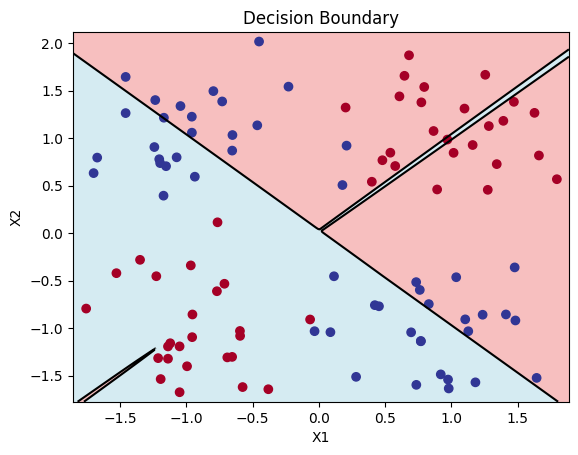

In [5]:
class MLP_V3: #Tanh
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
# Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
    def tanh(self, x):
        return np.tanh(x)
    def tanh_derivative(self, x):
        return 2*np.exp(x)/((np.exp(x)+1)**2)
    def forward(self, inputs):
# Forward pass through the network
        self.hidden_output = self.tanh(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output = self.tanh(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    def backward(self, inputs, targets, learning_rate):
# Backward pass through the network
# Compute error
        output_error = targets-self.output
        hidden_error = np.dot(output_error,self.weights_hidden_output.T)
# Compute gradients
        output_delta = self.tanh_derivative(self.output) * output_error
        hidden_delta = self.tanh_derivative(self.hidden_output) * hidden_error
# Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate* np.dot(self.hidden_output.T,output_delta)
        self.bias_output = self.bias_output+ learning_rate*np.sum(output_delta, axis = 0)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate*np.dot(inputs.T,hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate*np.sum(hidden_delta, axis=0)
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)
#Then you may define network parameters, create the network, train and test it.
# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.001
# Create neural network
nn = MLP(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
# Forward propagation
    output = nn.forward(x_train)
# Backpropagation
    nn.backward(x_train, y_train, learning_rate)

# Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((output -y_train)**2)
        print(f'Epoch {epoch}: Loss = {loss}')
# Test the trained neural network
y_predict = np.round(nn.forward(x_val)).astype(int)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')
#Finally, you should plot your final decision boundary from part1PlotBoundary function in utils.py.
part1PlotBoundary(x_val, y_val, nn)

## Part 2

In [6]:
def my_conv2d(input, kernel):
    """
    Simplified implementation of 2D convolution using NumPy.
    
    Args:
    - input: Input image or feature map with shape (batch_size, channels, height, width)
    - kernel: Convolution kernel with shape (out_channels, in_channels, kernel_height, kernel_width)
    
    Returns:
    - output: Convolved feature map with shape (batch_size, out_channels, output_height, output_width)
    """
    batch_size, in_channels, in_height, in_width = input.shape
    out_channels, kernel_in_channels, kernel_height, kernel_width = kernel.shape
    if in_channels != kernel_in_channels:
        raise ValueError("Error: Number of input channels in input and kernel do not match!")
    # Calculate output dimensions
    out_height = in_height - kernel_height + 1
    out_width = in_width - kernel_width + 1
    
    # Initialize output feature map
    output = np.zeros((batch_size, out_channels, out_height, out_width))
    
    # Perform convolution
    for b in range(batch_size):
        for k in range(out_channels):
            for i in range(out_height):
                for j in range(out_width):
                    output[b, k, i, j] = np.sum(input[b, :, i:i+kernel_height, j:j+kernel_width] * kernel[k])
    
    return output

In [7]:
input=np.load('share/data/samples_7.npy') #loading the necessary image from samples_7.npy since my number is 2442457
kernel=np.load('share/data/kernel.npy') #loading the necessary kernel to implement convolution
out = my_conv2d(input, kernel) #2D Convolution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


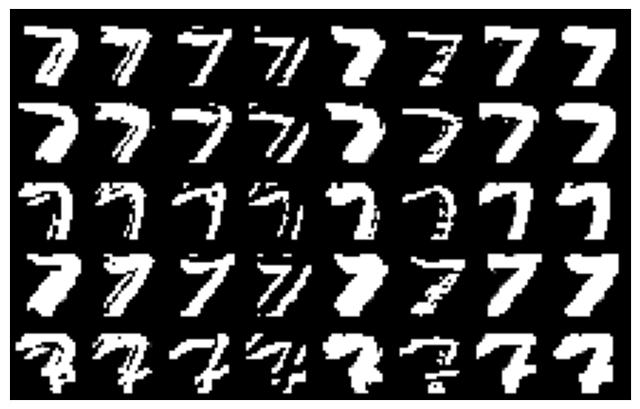

In [8]:
part2Plots(out)

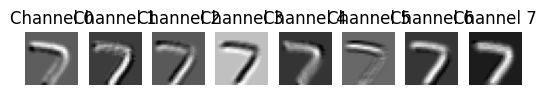

In [9]:
# Selecting the first image from the batch
image_index = 1

# Iterate over channels
for channel_index in range(out.shape[1]):  # 8 channels
    # Get the image data for the selected image and channel
    image_data = out[image_index, channel_index]

    # Plot the image
    plt.subplot(1, out.shape[1], channel_index + 1)
    plt.imshow(image_data, cmap='gray')  # Assuming grayscale data
    plt.title(f'Channel {channel_index}')
    plt.axis('off')

plt.show()

## Part 3 Experimental Work

In [2]:
class MLP_1(torch.nn.Module):
    def __init__(self, input_size):
        super(MLP_1,self).__init__()
        #Inıtıalize Layers and Activation Function
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,10)
        self.relu = torch.nn.ReLU()
        self.flatten = torch.nn.Flatten()
    def forward(self,x):
        #Forward Pass
        x = self.flatten(x)
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        return output
class MLP_2(torch.nn.Module):
    def __init__(self,input_size):
        super(MLP_2,self).__init__()
        #Inıtıalize Layers and Activation Function
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,64,bias=False)
        self.fc3 = torch.nn.Linear(64,10)
        self.flatten = torch.nn.Flatten()
        self.relu = torch.nn.ReLU()
    def forward(self,x):
        #Forward Pass
        x = self.flatten(x)
        hidden1 = self.fc1(x)
        relu = self.relu(hidden1)
        hidden2 = self.fc2(relu)
        output = self.fc3(hidden2)
        return output
class CNN_3(torch.nn.Module):
    def __init__(self):
        super(CNN_3, self).__init__()
        #Inıtıalize Layers and Activation Function
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=7, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(64,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        #Forward Pass
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.pool1(relu2)
        hidden4 = self.conv3(hidden3)
        hidden5 = self.pool2(hidden4)
        hidden5 =hidden5.flatten(1)
        output = self.fc(hidden5)
        return output
class CNN_4(torch.nn.Module):
    def __init__(self):
        super(CNN_4, self).__init__()
        #Inıtıalize Layers and Activation Function
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(144,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        #Forward Pass
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.pool1(relu3)
        hidden5 = self.conv4(hidden4)
        relu4 = self.relu(hidden5)
        hidden6 = self.pool2(relu4)
        hidden6 =hidden6.flatten(1)
        output = self.fc(hidden6)
        return output
class CNN_5(torch.nn.Module):
    def __init__(self):
        super(CNN_5, self).__init__()
        #Inıtıalize Layers and Activation Function
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        #Forward Pass
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.conv4(relu3)
        relu4 = self.relu(hidden4)
        hidden5 = self.pool(relu4)
        hidden6 =self.conv5(hidden5)
        relu5 = self.relu(hidden6)
        hidden7 = self.conv6(relu5)
        relu6 = self.relu(hidden7)
        hidden8 = self.pool(relu6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output


In [3]:
# Define train function
def train_part3(model, optimizer, criterion, device, epochs=15, save_every=10):
    train_loss_curve = []
    train_acc_curve = []
    val_acc_curve = []
    model = model.to(device)
    train_data = torchvision.datasets.FashionMNIST('share/data', train = True, download = True, transform = torchvision.transforms.ToTensor())
    train_generator = torch.utils.data.DataLoader(train_data, batch_size = 50, shuffle = True)
    len_train = len(train_data)
    len_val = len_train * 0.1
    len_train *= 0.9
    train_data_after_validation, validation_data = torch.utils.data.random_split(train_data, [int(len_train), int(len_val)])
    for epoch in range(epochs):
        print(epoch+1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validation_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()  # Set parameter gradients to zero
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward propagation
            optimizer.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Training accuracy
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and training accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())
                train_acc_curve.append(correct_train / total_train)

                # Validation accuracy
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)


    # Return the dictionary
    return {
        'name': model.__class__.__name__,
        'loss_curve': train_loss_curve,
        'train_acc_curve': train_acc_curve,
        'val_acc_curve': val_acc_curve,
    }


In [4]:
def save_result(result): #Define a save dictionary function
    with open(f"part3_{result['name']}.pkl", 'wb') as file:
        pickle.dump(result, file)

In [2]:
def load_result(path): #Define a load the result function
    with open(path, 'rb') as pickle_file:
        content = pickle.load(pickle_file)
    return content

In [15]:
def test(model,criterion, device): #Define a test function
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0
    test_data = torchvision.datasets.FashionMNIST('share/data', train = False, transform = torchvision.transforms.ToTensor())
    test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)
    with torch.no_grad():  # No need to track gradients during testing
        for data, target in test_generator:
            data, target = data.to(device), target.to(device)
            output = model(data)  # Forward pass
            loss = criterion(output, target)  # Calculate the loss
            
            test_loss += loss.item()  # Accumulate the test loss
            
            _, predicted = output.max(1)  # Get the index
            correct += predicted.eq(target).sum().item()  # Count the number of correct predictions
            total += target.size(0)  # Total number of samples
            
    # Calculate the average loss and accuracy
    test_loss /= len(test_generator)
    test_accuracy = 100.0 * correct / total
    
    return test_loss, test_accuracy

In [7]:
def initModel(model):
    optimizer = optim.Adam(model.parameters(), lr = 0.001) #initialize Adam optimizer with default parameters
    criterion = torch.nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    return optimizer, criterion, device

In [8]:
def trainModel(model, filename):
    optimizer, criterion, device = initModel(model)
    # Train the model
    result = train_part3(model, optimizer, criterion, device)
    test_data = torchvision.datasets.FashionMNIST('share/data', train=False, transform=torchvision.transforms.ToTensor())
    # Compute test accuracy
    test_acc = test(model, criterion, device)
    print(test_acc) #Print the Test Accuracy
    # Record the weights of the first layer and pass it to cpu to use as numpy array
    weights_first_layer = model.fc1.weight.data.cpu().numpy()

    # Add test accuracy and weights to result dictionary
    result['test_acc'] = test_acc
    result['weights'] = weights_first_layer
    
    # Save the resulting dictionary
    save_result(result)
    # Save the model itself
    model= torch.jit.script(model) # Export to TorchScript
    model.save(filename) # Save
    return result

In [10]:
result_MLP_1 = trainModel(model=MLP_1(input_size=784), filename="model_MLP1.pt")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(0.37856857135891914, 86.46)


In [11]:
result_MLP_2 = trainModel(model=MLP_2(input_size=784), filename="model_MLP2.pt")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(0.41160098418593405, 85.51)


In [12]:
result_CNN_3 = trainModel(model=CNN_3(), filename="model_CNN3.pt")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(0.31927204817533494, 88.79)


In [13]:
result_CNN_4 = trainModel(model=CNN_4(), filename="model_CNN4.pt")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(0.28252636481076476, 90.35)


In [14]:
result_CNN_5 = trainModel(model=CNN_5(), filename="model_CNN5.pt")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(0.34654338512569666, 87.87)


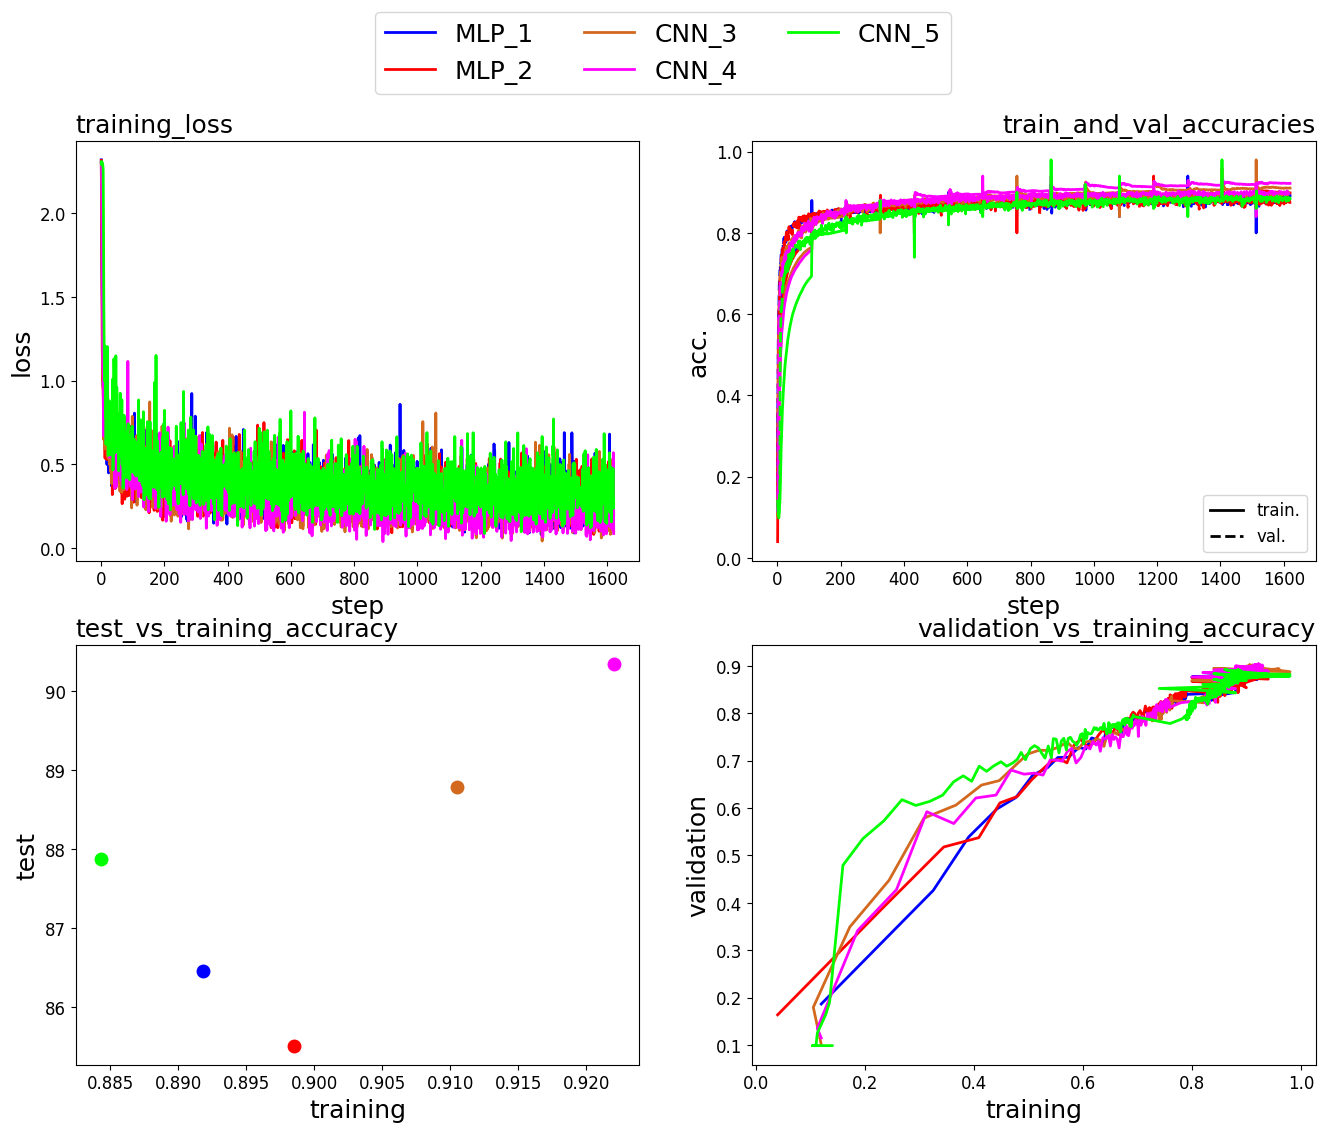

In [32]:
results_part5 = [result_MLP_1, result_MLP_2, result_CNN_3, result_CNN_4, result_CNN_5] # Save the dictionaries as a list
for result in results_part5:
    result['test_acc'] = result['test_acc'][1]
part3Plots(results_part5)


## Part 4

In [33]:
class MLP_1_ReLU(torch.nn.Module):
    def __init__(self, input_size):
        super(MLP_1_ReLU,self).__init__()
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,10)
        self.relu = torch.nn.ReLU()
        self.flatten = torch.nn.Flatten()
    def forward(self,x):
        x = self.flatten(x)
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        return output
class MLP_2_ReLU(torch.nn.Module):
    def __init__(self,input_size):
        super(MLP_2_ReLU,self).__init__()
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,64,bias=False)
        self.fc3 = torch.nn.Linear(64,10)
        self.flatten = torch.nn.Flatten()
        self.relu = torch.nn.ReLU()
    def forward(self,x):
        x = self.flatten(x)
        hidden1 = self.fc1(x)
        relu = self.relu(hidden1)
        hidden2 = self.fc2(relu)
        output = self.fc3(hidden2)
        return output
class CNN_3_ReLU(torch.nn.Module):
    def __init__(self):
        super(CNN_3_ReLU, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=7, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(64,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.pool1(relu2)
        hidden4 = self.conv3(hidden3)
        hidden5 = self.pool2(hidden4)
        hidden5 =hidden5.flatten(1)
        output = self.fc(hidden5)
        return output
class CNN_4_ReLU(torch.nn.Module):
    def __init__(self):
        super(CNN_4_ReLU, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(144,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.pool1(relu3)
        hidden5 = self.conv4(hidden4)
        relu4 = self.relu(hidden5)
        hidden6 = self.pool2(relu4)
        hidden6 =hidden6.flatten(1)
        output = self.fc(hidden6)
        return output
class CNN_5_ReLU(torch.nn.Module):
    def __init__(self):
        super(CNN_5_ReLU, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.conv4(relu3)
        relu4 = self.relu(hidden4)
        hidden5 = self.pool(relu4)
        hidden6 =self.conv5(hidden5)
        relu5 = self.relu(hidden6)
        hidden7 = self.conv6(relu5)
        relu6 = self.relu(hidden7)
        hidden8 = self.pool(relu6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output
#The same as the neural networks above except the activation function is Sigmoid instead of ReLU
class MLP_1_Sigmoid(torch.nn.Module):
    def __init__(self, input_size):
        super(MLP_1_Sigmoid,self).__init__()
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,10)
        self.sigmoid = torch.nn.Sigmoid()
        self.flatten = torch.nn.Flatten()
    def forward(self,x):
        x = self.flatten(x)
        hidden = self.fc1(x)
        sigmoid = self.sigmoid(hidden)
        output = self.fc2(sigmoid)
        return output
class MLP_2_Sigmoid(torch.nn.Module):
    def __init__(self,input_size):
        super(MLP_2_Sigmoid,self).__init__()
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,32)
        self.fc2 = torch.nn.Linear(32,64,bias=False)
        self.fc3 = torch.nn.Linear(64,10)
        self.flatten = torch.nn.Flatten()
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self,x):
        x = self.flatten(x)
        hidden1 = self.fc1(x)
        sigmoid = self.sigmoid(hidden1)
        hidden2 = self.fc2(sigmoid)
        output = self.fc3(hidden2)
        return output
class CNN_3_Sigmoid(torch.nn.Module):
    def __init__(self):
        super(CNN_3_Sigmoid, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=7, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(64,10)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        hidden1 = self.fc1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        hidden3 = self.pool1(sigmoid2)
        hidden4 = self.conv3(hidden3)
        hidden5 = self.pool2(hidden4)
        hidden5 =hidden5.flatten(1)
        output = self.fc(hidden5)
        return output
class CNN_4_Sigmoid(torch.nn.Module):
    def __init__(self):
        super(CNN_4_Sigmoid, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding='valid')
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = torch.nn.Linear(144,10)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        hidden1 = self.fc1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        hidden3 = self.conv3(sigmoid2)
        sigmoid3 = self.sigmoid(hidden3)
        hidden4 = self.pool1(sigmoid3)
        hidden5 = self.conv4(hidden4)
        sigmoid4 = self.sigmoid(hidden5)
        hidden6 = self.pool2(sigmoid4)
        hidden6 =hidden6.flatten(1)
        output = self.fc(hidden6)
        return output
class CNN_5_Sigmoid(torch.nn.Module):
    def __init__(self):
        super(CNN_5_Sigmoid, self).__init__()
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        hidden1 = self.fc1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        hidden3 = self.conv3(sigmoid2)
        sigmoid3 = self.sigmoid(hidden3)
        hidden4 = self.conv4(sigmoid3)
        sigmoid4 = self.sigmoid(hidden4)
        hidden5 = self.pool(sigmoid4)
        hidden6 =self.conv5(hidden5)
        sigmoid5 = self.sigmoid(hidden6)
        hidden7 = self.conv6(sigmoid5)
        sigmoid6 = self.sigmoid(hidden7)
        hidden8 = self.pool(sigmoid6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output


In [45]:
# Define a train function similar to in par3
def train_part4(model_relu, model_sigmoid, optimizer_ReLU,optimizer_Sigmoid, criterion, device, epochs=15, save_every=10):
    result = {
        'name': model_relu.__class__.__name__,
        'relu_loss_curve': [],
        'sigmoid_loss_curve': [],
        'relu_grad_curve': [],
        'sigmoid_grad_curve': []
    }
    train_data = torchvision.datasets.FashionMNIST('share/data', train = True, download = True, transform = torchvision.transforms.ToTensor())
    
    model_relu = model_relu.to(device)
    model_sigmoid = model_sigmoid.to(device)

    for epoch in range(epochs):
        train_generator = torch.utils.data.DataLoader(train_data, batch_size = 50, shuffle = True)
        print(epoch+1)
        model_relu.train()
        model_sigmoid.train()
        running_loss_relu = 0.0
        running_loss_sigmoid = 0.0
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            
            # ReLU Model Training
            optimizer_ReLU.zero_grad()
            output_relu = model_relu(data)
            loss_relu = criterion(output_relu, target)
            loss_relu.backward()
            optimizer_ReLU.step()
            running_loss_relu += loss_relu.item() * data.size(0)

            # Sigmoid Model Training
            optimizer_Sigmoid.zero_grad()
            output_sigmoid = model_sigmoid(data)
            loss_sigmoid = criterion(output_sigmoid, target)
            loss_sigmoid.backward()
            optimizer_Sigmoid.step()
            running_loss_sigmoid += loss_sigmoid.item() * data.size(0)

            # Record loss and gradient magnitude every print_every steps
            if batch_idx % save_every == 0:
                result['relu_loss_curve'].append(loss_relu.item())
                result['sigmoid_loss_curve'].append(loss_sigmoid.item())
                result['relu_grad_curve'].append(torch.norm(model_relu.fc1.weight.grad).item())
                result['sigmoid_grad_curve'].append(torch.norm(model_sigmoid.fc1.weight.grad).item())

        # Shuffle the dataset after each epoch

    return result

In [42]:
def save_result_Part4(result, filename):
    with open(f"part4_{filename}.pkl", "wb") as f:
        pickle.dump(result, f)

In [43]:
def init_model_part4(model_ReLU,model_Sigmoid):
    optimizer = optim.SGD
    learning_rate = 0.01
    momentum = 0.0
    criterion = torch.nn.CrossEntropyLoss()
    optimizer_ReLU = optimizer(model_ReLU.parameters(),lr=learning_rate,momentum=momentum)
    optimizer_Sigmoid = optimizer(model_Sigmoid.parameters(),lr=learning_rate,momentum=momentum)
    return optimizer_ReLU, optimizer_Sigmoid, criterion
def train_initialized_mode_part4(model_ReLU,model_Sigmoid,architecture_name):
    optimizer_ReLU, optimizer_Sigmoid, criterion = init_model_part4(model_ReLU=model_ReLU,model_Sigmoid=model_Sigmoid)
    output_dict = train_part4(model_relu=model_ReLU,model_sigmoid=model_Sigmoid,optimizer_ReLU=optimizer_ReLU,optimizer_Sigmoid=optimizer_Sigmoid,criterion=criterion,device = 'cuda',epochs = 15, save_every=10)
    save_result_Part4(output_dict,architecture_name)
    return output_dict

In [48]:
result_MLP_1 = train_initialized_mode_part4(model_ReLU=MLP_1_ReLU(input_size=784),model_Sigmoid=MLP_1_Sigmoid(input_size=784),architecture_name='MLP_1_results')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [49]:
result_MLP_2 = train_initialized_mode_part4(model_ReLU=MLP_2_ReLU(input_size=784),model_Sigmoid=MLP_2_Sigmoid(input_size=784),architecture_name='MLP_2_results')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [50]:
result_CNN_3 = train_initialized_mode_part4(model_ReLU=CNN_3_ReLU(),model_Sigmoid=CNN_3_Sigmoid(),architecture_name='CNN_3_results')

1


2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [51]:
result_CNN_4 = train_initialized_mode_part4(model_ReLU=CNN_4_ReLU(),model_Sigmoid=CNN_4_Sigmoid(),architecture_name='CNN_4_results')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [52]:
result_CNN_5 = train_initialized_mode_part4(model_ReLU=CNN_5_ReLU(),model_Sigmoid=CNN_5_Sigmoid(),architecture_name='CNN_5_results')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


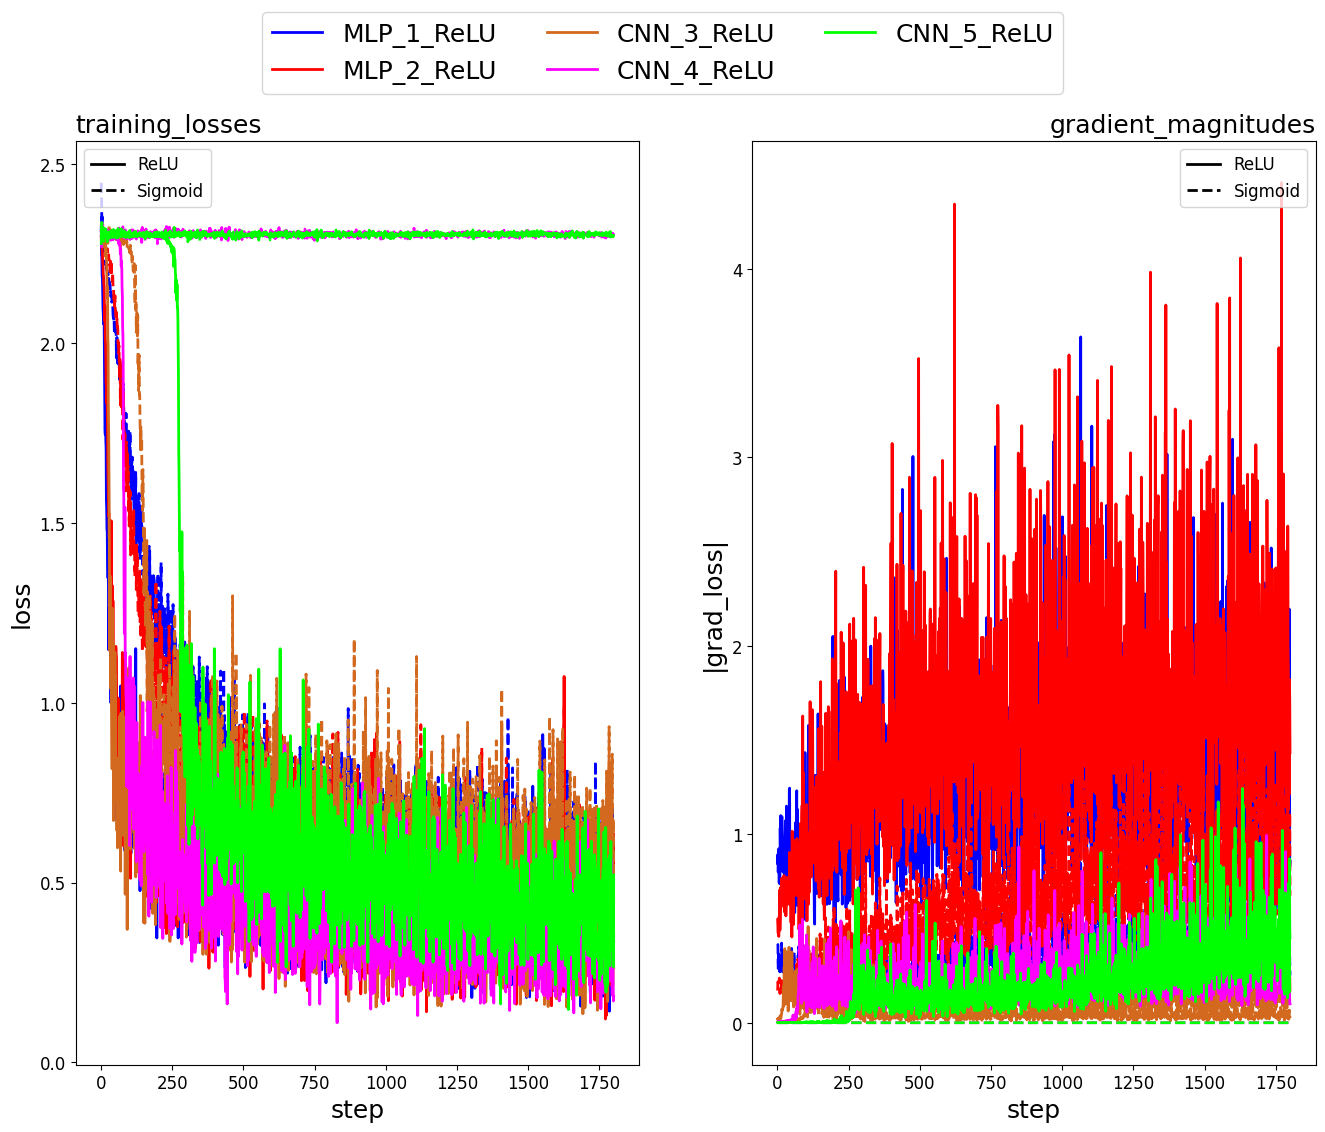

In [55]:
results_part4 = [result_MLP_1,result_MLP_2,result_CNN_3,result_CNN_4,result_CNN_5] # Save the dictionaries as a list to plot with part4Plots
part4Plots(results_part4)

## Part 5

In [12]:
class CNN_5_ReLU_01(torch.nn.Module):
    def __init__(self):
        super(CNN_5_ReLU_01, self).__init__()
        self.lr = 0.1
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.conv4(relu3)
        relu4 = self.relu(hidden4)
        hidden5 = self.pool(relu4)
        hidden6 =self.conv5(hidden5)
        relu5 = self.relu(hidden6)
        hidden7 = self.conv6(relu5)
        relu6 = self.relu(hidden7)
        hidden8 = self.pool(relu6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output
class CNN_5_ReLU_001(torch.nn.Module):
    def __init__(self):
        super(CNN_5_ReLU_001, self).__init__()
        self.lr = 0.01
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.conv4(relu3)
        relu4 = self.relu(hidden4)
        hidden5 = self.pool(relu4)
        hidden6 =self.conv5(hidden5)
        relu5 = self.relu(hidden6)
        hidden7 = self.conv6(relu5)
        relu6 = self.relu(hidden7)
        hidden8 = self.pool(relu6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output
class CNN_5_ReLU_0001(torch.nn.Module):
    def __init__(self):
        super(CNN_5_ReLU_0001, self).__init__()
        self.lr = 0.001
        self.fc1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.conv4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding='valid')
        self.conv6 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding='valid')
        self.fc = torch.nn.Linear(72,10)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.conv4(relu3)
        relu4 = self.relu(hidden4)
        hidden5 = self.pool(relu4)
        hidden6 =self.conv5(hidden5)
        relu5 = self.relu(hidden6)
        hidden7 = self.conv6(relu5)
        relu6 = self.relu(hidden7)
        hidden8 = self.pool(relu6)
        hidden8 = hidden8.flatten(1)
        output = self.fc(hidden8)
        return output

In [3]:
# Define training function in for part5 similar to part3
def train_part5(model,optimizer,criterion, device, epochs=20, save_every=10):
    train_loss_curve = []
    val_acc_curve = []
    resulting_dictionary_part5 = {
        'name': model.__class__.__name__,
        'training_loss_curve': [],
        'validation_accuracy_curve': []
    }
    train_data = torchvision.datasets.FashionMNIST('share/data', train=True, download=True, transform=torchvision.transforms.ToTensor())
    len_train = len(train_data)
    len_val = int(len_train * 0.1)
    len_train -= len_val
    train_data_after_validation, validate_data = torch.utils.data.random_split(train_data, [len_train, len_val])
    model = model.to(device)
    for epoch in range(epochs):
        print(epoch+1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    resulting_dictionary_part5['train_loss_curve'] = train_loss_curve
    resulting_dictionary_part5['validation_accuracy_curve'] = val_acc_curve
    return resulting_dictionary_part5

In [5]:
def save_result_Part5(result, filename):
    with open(f"part5_{filename}.pkl", "wb") as f:
        pickle.dump(result, f)

In [6]:
def initialize_model_part5(model):
    model = model
    lr = model.lr
    momentum = 0.0
    optimizer = optim.SGD(model.parameters(), lr = lr,momentum=momentum)
    criterion = torch.nn.CrossEntropyLoss()
    return optimizer, criterion
def train_initialized_model_part5(model, module_name):
    optimizer, criterion = initialize_model_part5(model)
    output_dict = train_part5(model=model, optimizer=optimizer, criterion=criterion, device = 'cuda', epochs = 20, save_every = 10)
    save_result_Part5(output_dict, module_name)
    return output_dict

In [74]:
result_CNN_5_ReLU_0001 = train_initialized_model_part5(CNN_5_ReLU_0001(),'CNN_5_ReLU_0.001')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [75]:
result_CNN_5_ReLU_001 = train_initialized_model_part5(CNN_5_ReLU_001(),'CNN_5_ReLU_0.01')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [7]:
result_CNN_5_ReLU_01 = train_initialized_model_part5(CNN_5_ReLU_01(),'CNN_5_ReLU_0.1')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


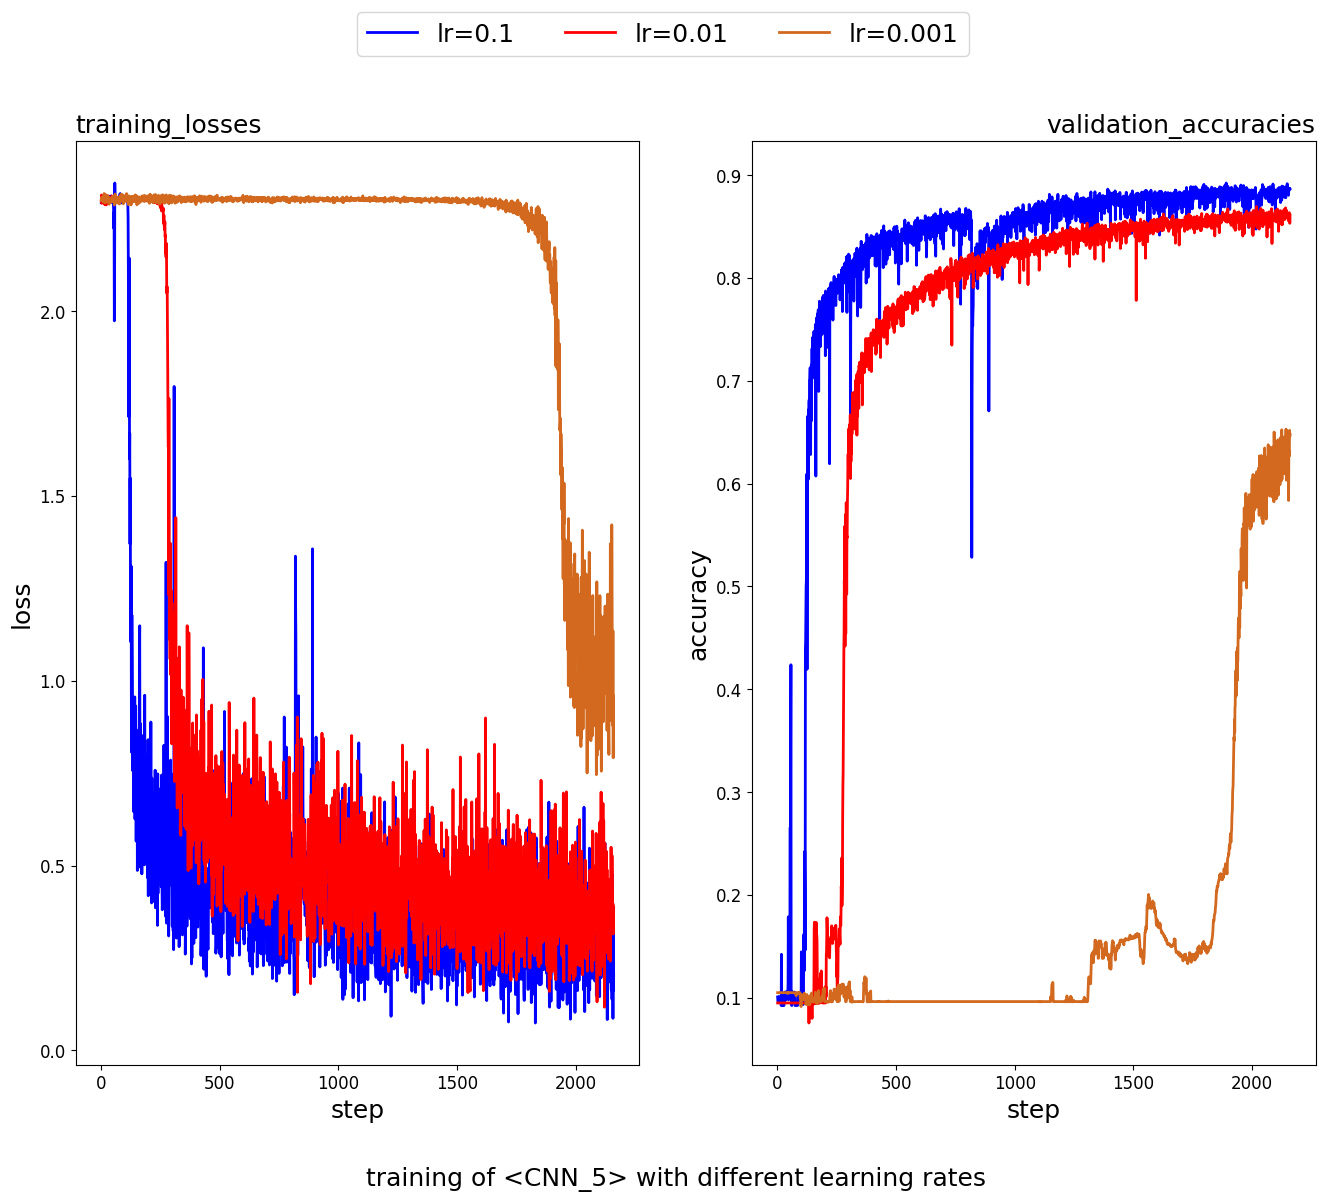

In [14]:
final_dict_part5 = {'name':'CNN_5', 
              'loss_curve_1':result_CNN_5_ReLU_01['train_loss_curve'],
              'loss_curve_01':result_CNN_5_ReLU_001['train_loss_curve'],
              'loss_curve_001':result_CNN_5_ReLU_0001['train_loss_curve'],
              'val_acc_curve_1':result_CNN_5_ReLU_01['validation_accuracy_curve'],
              'val_acc_curve_01':result_CNN_5_ReLU_001['validation_accuracy_curve'],
              'val_acc_curve_001':result_CNN_5_ReLU_0001['validation_accuracy_curve']}
part5Plots(final_dict_part5)


In [7]:
# Define another training function for part5 with two different optimizers and epochs
def train_part5_v2(model,optimizer_v1,optimizer_v2,criterion, device, epochs_1,epochs_2, save_every=10):
    train_loss_curve = []
    val_acc_curve = []
    resulting_dictionary_v1 = {
        'name': model.__class__.__name__,
        'validation_accuracy_curve': []
    }
    resulting_dictionary_v2 = {
        'name': model.__class__.__name__,
        'validation_accuracy_curve': []
    }
    train_data = torchvision.datasets.FashionMNIST('share/data', train=True, download=True, transform=torchvision.transforms.ToTensor())
    len_train = len(train_data)
    len_val = int(len_train * 0.1)
    len_train -= len_val
    train_data_after_validation, validate_data = torch.utils.data.random_split(train_data, [len_train, len_val])
    model = model.to(device)
    for epoch in range(epochs_1):
        print(epoch+1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer_v1.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer_v1.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    resulting_dictionary_v1['validation_accuracy_curve'] = val_acc_curve
    for epoch in range(epochs_2):
        print(epoch+1+epochs_1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer_v2.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer_v2.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    resulting_dictionary_v2['validation_accuracy_curve'] = val_acc_curve
    return resulting_dictionary_v1, resulting_dictionary_v2

In [8]:
model_to_analyze_part5 = model=CNN_5_ReLU_01()
momentum = 0.0
optimizer_v1 = optim.SGD(model.parameters(), lr = 0.1,momentum=momentum)
criterion = torch.nn.CrossEntropyLoss() 
optimizer_v2 = optim.SGD(model.parameters(), lr = 0.01,momentum=momentum)
analyzed_model_dict_v1 , analyzed_model_dict_v2 = train_part5_v2(model=model_to_analyze_part5,
                                                                optimizer_v1=optimizer_v1,
                                                                optimizer_v2=optimizer_v2,
                                                                criterion=criterion, 
                                                                device = 'cuda', 
                                                                epochs_1=13, #Train until epoch 13
                                                                epochs_2=17, #continute trainnig until 30
                                                                save_every = 10)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [9]:
save_result_Part5(analyzed_model_dict_v1, 'analyzed_model_dict_v1_v1')
save_result_Part5(analyzed_model_dict_v2, 'analyzed_model_dict_v2_v1')

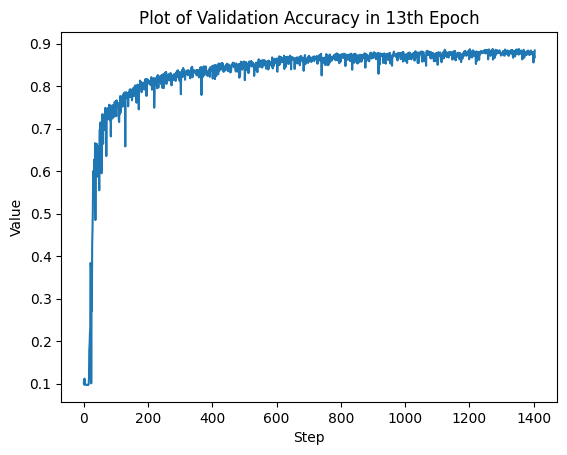

In [16]:
values_v1 = analyzed_model_dict_v1['validation_accuracy_curve'][0:int(13*1080*0.1)]
plt.plot(values_v1)

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Plot of Validation Accuracy in 13th Epoch')

# Show the plot
plt.show()

In [16]:
values_v11 = values_v1[0:1403]

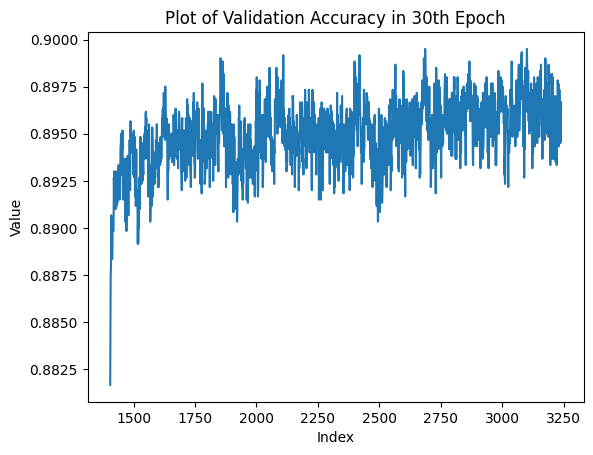

In [25]:
values_v2 = analyzed_model_dict_v2['validation_accuracy_curve'][int(13*1080/10 +1):int(30*1080/10)]
plt.plot(list(range(int(13*1080/10 +1),int(30*1080/10))),values_v2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Validation Accuracy in 30th Epoch')

# Show the plot
plt.show()

In [19]:
# Define another training function for part5 with three different optimizers and epochs
def train_part5_v3(model,optimizer_v1,optimizer_v2,optimizer_v3, criterion, device, epochs_1,epochs_2,epochs_3, save_every=10):
    train_loss_curve = []
    val_acc_curve = []
    resulting_dictionary_v1 = {
        'name': model.__class__.__name__,
        'validation_accuracy_curve': []
    }
    resulting_dictionary_v2 = {
        'name': model.__class__.__name__,
        'validation_accuracy_curve': []
    }
    resulting_dictionary_v3= {
        'name': model.__class__.__name__,
        'validation_accuracy_curve': []
    }
    train_data = torchvision.datasets.FashionMNIST('share/data', train=True, download=True, transform=torchvision.transforms.ToTensor())
    len_train = len(train_data)
    len_val = int(len_train * 0.1)
    len_train -= len_val
    train_data_after_validation, validate_data = torch.utils.data.random_split(train_data, [len_train, len_val])
    model = model.to(device)
    for epoch in range(epochs_1):
        print(epoch+1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer_v1.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer_v1.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    resulting_dictionary_v1['validation_accuracy_curve'] = val_acc_curve
    model_to_save= torch.jit.script(model) # Export to TorchScript
    model_to_save.save('model_trained_in_part5_v1.pt') # Save
    for epoch in range(epochs_2):
        print(epoch+1+epochs_1)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer_v2.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer_v2.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    model_to_save= torch.jit.script(model) # Export to TorchScript
    model_to_save.save('model_trained_in_part5_v2.pt') # Save
    resulting_dictionary_v2['validation_accuracy_curve'] = val_acc_curve
    for epoch in range(epochs_3):
        print(epoch+1+epochs_1+epochs_2)
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_generator = torch.utils.data.DataLoader(train_data_after_validation, batch_size=50, shuffle=True)
        validate_generator = torch.utils.data.DataLoader(validate_data, batch_size=50, shuffle=True)
        for batch_idx, (data, target) in enumerate(train_generator):
            data, target = data.to(device), target.to(device)
            optimizer_v3.zero_grad()  # Zero the parameter gradients
            output = model(data)   # Forward pass
            loss = criterion(output, target)  # Compute the loss
            loss.backward()        # Backward pass
            optimizer_v3.step()       # Optimize
            running_loss += loss.item() * data.size(0)  # Accumulate the loss

            # Calculate training accuracy   
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)

            # Record training loss and accuracy
            if batch_idx % save_every == 0:
                train_loss_curve.append(loss.item())

                # Validation accuracy calculation
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    model.eval()
                    for val_data, val_target in validate_generator:
                        val_data, val_target = val_data.to(device), val_target.to(device)
                        val_output = model(val_data)
                        _, val_predicted = torch.max(val_output, 1)
                        correct_val += (val_predicted == val_target).sum().item()
                        total_val += val_target.size(0)

                val_acc = correct_val / total_val
                val_acc_curve.append(val_acc)
    resulting_dictionary_v3['validation_accuracy_curve'] = val_acc_curve
    model_to_save= torch.jit.script(model) # Export to TorchScript
    model_to_save.save('model_trained_in_part5_v3.pt') # Save
    return resulting_dictionary_v1, resulting_dictionary_v2,resulting_dictionary_v3

In [21]:
model_to_analyze_part5 = model=CNN_5_ReLU_01()
momentum = 0.0
optimizer_v1 = optim.SGD(model.parameters(), lr = 0.1,momentum=momentum)
criterion = torch.nn.CrossEntropyLoss() 
optimizer_v2 = optim.SGD(model.parameters(), lr = 0.01,momentum=momentum)
optimizer_v3 = optim.SGD(model.parameters(), lr = 0.001,momentum=momentum)
analyzed_model_dict_v1_v2 , analyzed_model_dict_v2_v2, analyzed_model_dict_v3_v2 = train_part5_v3(model=model_to_analyze_part5,
                                                                optimizer_v1=optimizer_v1,
                                                                optimizer_v2=optimizer_v2,
                                                                optimizer_v3=optimizer_v3,
                                                                criterion=criterion, 
                                                                device = 'cuda', 
                                                                epochs_1=13, #Train until epoch 13
                                                                epochs_2=2,
                                                                epochs_3=15, #continute trainnig until the step determined in 5
                                                                save_every = 10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [32]:
save_result_Part5(analyzed_model_dict_v1_v2, 'analyzed_model_dict_v1_v2')
save_result_Part5(analyzed_model_dict_v2_v2, 'analyzed_model_dict_v2_v2')
save_result_Part5(analyzed_model_dict_v3_v2, 'analyzed_model_dict_v3_v2')

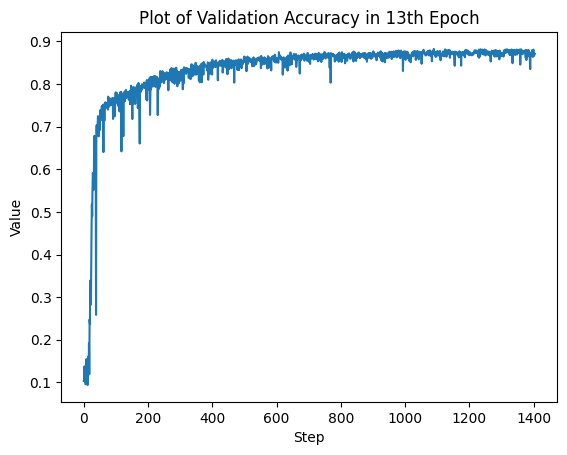

In [33]:
values_v1_v2 = analyzed_model_dict_v1_v2['validation_accuracy_curve'][0:int(13*1080*0.1)]
plt.plot(values_v1_v2)

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Plot of Validation Accuracy in 13th Epoch')

# Show the plot
plt.show()

In [5]:
analyzed_model_dict_v2_v2 = load_result('part5_analyzed_model_dict_v2_v2.pkl')
analyzed_model_dict_v3_v2 = load_result('part5_analyzed_model_dict_v3_v2.pkl')

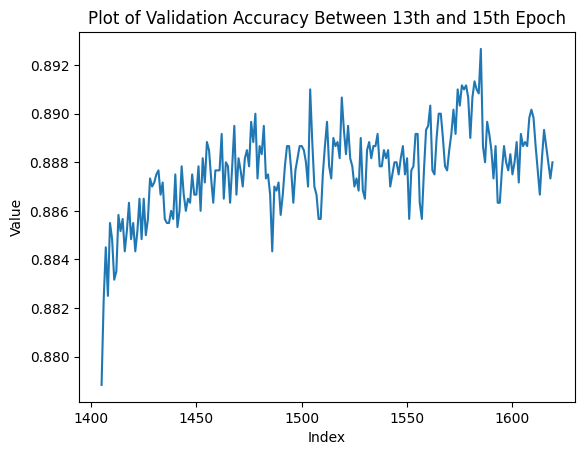

In [6]:
values_v2_v2 = analyzed_model_dict_v2_v2['validation_accuracy_curve'][int(13*1080/10 +1):int(15*1080/10)]
plt.plot(list(range(int(13*1080/10 +1),int(15*1080/10))),values_v2_v2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Validation Accuracy Between 13th and 15th Epoch')

# Show the plot
plt.show()

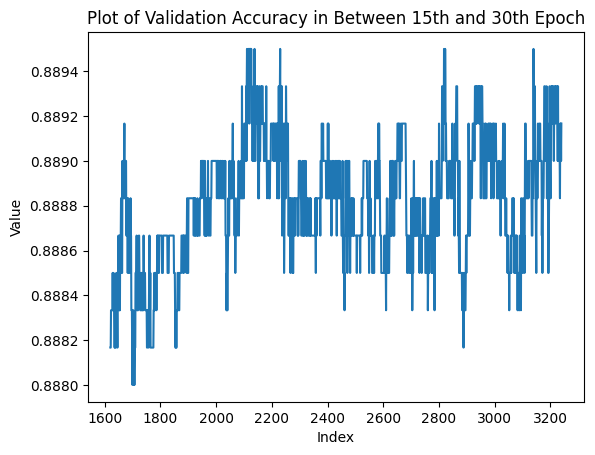

In [7]:
values_v3_v2 = analyzed_model_dict_v3_v2['validation_accuracy_curve'][int(15*1080/10 +1):int(30*1080/10)]
plt.plot(list(range(int(15*1080/10 +1),int(30*1080/10))),values_v3_v2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Validation Accuracy in Between 15th and 30th Epoch')

# Show the plot
plt.show()

In [25]:
model = torch.load('model_trained_in_part5.pt') #load the model that trained in the last part of part 5
test_acc = test(model,criterion=criterion,device='cuda')
print(test_acc)

(0.3000047041475773, 89.51)
